In [29]:
import numpy as np
from sympy import false

def ndarray_to_list(l):
    newL = l.tolist()
    newL.sort()
    return newL

def det(p1,p2,p3):
    return (p1[0]*p2[1]) + (p3[0]*p1[1]) + (p2[0]*p3[1]) - (p1[0]*p3[1]) - (p2[0]*p1[1]) - (p3[0]*p2[1])

def whichArea(p1,p2,p3):            #memvalidasi daerah dari koordinat titik p3 terhadap garis p1p2
    determinan = det(p1,p2,p3)
    if(determinan == 0):
        return 0
    elif (determinan > 0):
        return 1
    elif (determinan < 0):
        return -1

def divideArea(p1,arr,p2):          #mengembalikan daerah s1 dan s2 terhadap garis p1p2
    s1 = [] ; s2 = []
    dontcare = 0
    for idx in range(len(arr)):
        area = whichArea(p1,p2,arr[idx])
        if(area == 1):
            s1.append(arr[idx])            
        if(area == 0):
            dontcare += 1
        if(area == -1):
            s2.append(arr[idx])

    return s1,s2

def eliminateInsideTriangle(p1,p2,p3,points,area):
    newPoint = []
    for point in points:
        a1 = whichArea(p1,p3,point)
        a2 = whichArea(p2,p3,point)
        if(area == 1):
            if(a1 == 1 or a2 == -1):
                newPoint.append(point)
        elif(area == 2):
            if(a1 == -1 or a2 == 1):
                newPoint.append(point)

    return newPoint

def farthestPoint(p1,arr,p2):       #mengembalikan sebuah koordinat titik terluar (terjauh dari garis p1p2)
    farthest = [0,0]
    d = 0
    for idx in range(len(arr)):
        point1   = np.array(p1)
        point2   = np.array(p2)
        point    = np.array(arr[idx])
        distance = np.linalg.norm(np.cross(point2-point1, point1-point))/np.linalg.norm(point2-point1)
        
        if(d < distance):
            d = distance
            farthest = point.tolist()

    return farthest

def findConvex(p1,arr,p2,area):
    if(len(arr) == 0):
        return []
    if(len(arr) == 1):      #bersisa titik terluar atau tidak memiliki titik di luar hull
        return arr
    else:
        points = []
        if(area == 0):
            s1 , s2 = divideArea(p1 , arr , p2)

            #DAERAH S1
            newP1 = farthestPoint(p1,s1,p2)     #titik terjauh daerah S1
            points.append(newP1)
            newS1 = eliminateInsideTriangle(p1,p2,newP1,s1,1)

            s1_fromS1_left , ignorePart = divideArea(p1,newS1,newP1)       #daerah kiri-atas antara p1-newP1 (s1_fromS1_left)
            s1_fromS1_right , ignorePart = divideArea(newP1,newS1,p2)      #daerah kanan-atas antara newP1-p2 (s1_fromS1_right)
            newPoint1 = findConvex(p1 , s1_fromS1_left , newP1 , 1)
            newPoint2 = findConvex(newP1 , s1_fromS1_right , p2 , 1)

            #DAERAH S2
            newP2 = farthestPoint(p1,s2,p2)     #titik terjauh daerah S2
            points.append(newP2)
            newS2 = eliminateInsideTriangle(p1,p2,newP2,s2,2)

            ignorePart , s2_fromS2_left = divideArea(p1,newS2,newP2)       #daerah kiri-bawah antara p1-newP2 (s2_fromS2_left)
            ignorePart , s2_fromS2_right = divideArea(newP2,newS2,p2)      #daerah kanan-bawah antara newP2-p2 (s2_fromS2_right)
            newPoint3 = findConvex(p1 , s2_fromS2_left , newP2 , 2)
            newPoint4 = findConvex(newP2 , s2_fromS2_right , p2 , 2)

            return points + newPoint1 + newPoint2 + newPoint3 + newPoint4

        elif (area == 1):
            newP = farthestPoint(p1,arr,p2)
            points.append(newP)
            newS1 = eliminateInsideTriangle(p1,p2,newP,arr,1)

            s1_left , ignorePart = divideArea(p1,newS1,newP)
            s1_right , ignorePart = divideArea(newP,newS1,p2)
            newPoint1 = findConvex(p1, s1_left , newP , 1)
            newPoint2 = findConvex(newP, s1_right , p2 , 1)

            return points + newPoint1 + newPoint2

        elif (area == 2):
            newP = farthestPoint(p1,arr,p2)
            points.append(newP)
            newS2 = eliminateInsideTriangle(p1,p2,newP,arr,2)
            
            ignorePart , s2_left = divideArea(p1,newS2,newP)
            ignorePart , s2_right = divideArea(newP,newS2,p2)
            newPoint1 = findConvex(p1, s2_left , newP , 2)
            newPoint2 = findConvex(newP, s2_right , p2 , 2)
            
            return points + newPoint1 + newPoint2

def convexHull(bucket):
    newBucket = ndarray_to_list(bucket)
    p1 = newBucket[0]
    p2 = newBucket[len(newBucket)-1]
    Points = findConvex(p1 , newBucket , p2 , 0)
    Points.sort()
    return [p1] + Points + [p2]


In [30]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import datasets

data = datasets.load_iris() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 

#visualisasi hasil ConvexHull
import matplotlib.pyplot as plt

#implementasi myConvexHull
import myConvexHull as ch

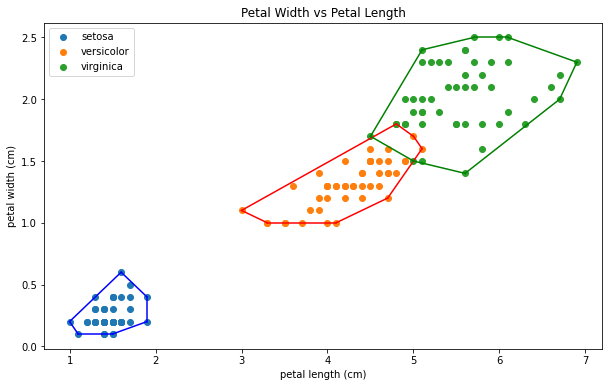

In [32]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
x_plot = 2 ; y_plot = 3
plt.xlabel(data.feature_names[x_plot])
plt.ylabel(data.feature_names[y_plot])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[x_plot , y_plot]].values
    hulls = ch.convexHull(bucket)
    p1 = hulls[0]
    p2 = hulls[len(hulls)-1]
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

    upperP = p1 ; belowP = p1
    for idx in range(1,len(hulls)):
        p3 = hulls[idx]
        if(p3 == p2):
            #UPPER PART
            x_edge1 , y_edge1 = upperP[0] , upperP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
            x = np.array([x_edge1] + [x_edge2])
            y = np.array([y_edge1] + [y_edge2])
            plt.plot(x, y, colors[i])
            #BELOW PART
            x_edge1 , y_edge1 = belowP[0] , belowP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
        else:
            if(ch.whichArea(p1,p2,p3) == 1):
                x_edge1 , y_edge1 = upperP[0] , upperP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                upperP = p3
            elif(ch.whichArea(p1,p2,p3) == -1):
                x_edge1 , y_edge1 = belowP[0] , belowP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                belowP = p3

        x = np.array([x_edge1] + [x_edge2])
        y = np.array([y_edge1] + [y_edge2])
        plt.plot(x, y, colors[i])
    plt.legend()

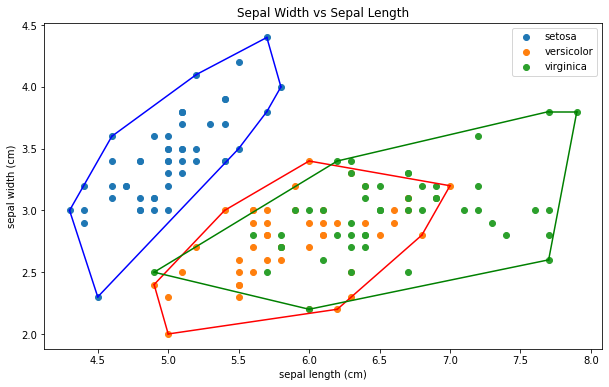

In [31]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
x_plot = 0 ; y_plot = 1
plt.xlabel(data.feature_names[x_plot])
plt.ylabel(data.feature_names[y_plot])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[x_plot , y_plot]].values
    hulls = ch.convexHull(bucket)
    p1 = hulls[0]
    p2 = hulls[len(hulls)-1]
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

    upperP = p1 ; belowP = p1
    for idx in range(1,len(hulls)):
        p3 = hulls[idx]
        if(p3 == p2):
            #UPPER PART
            x_edge1 , y_edge1 = upperP[0] , upperP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
            x = np.array([x_edge1] + [x_edge2])
            y = np.array([y_edge1] + [y_edge2])
            plt.plot(x, y, colors[i])
            #BELOW PART
            x_edge1 , y_edge1 = belowP[0] , belowP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
        else:
            if(ch.whichArea(p1,p2,p3) == 1):
                x_edge1 , y_edge1 = upperP[0] , upperP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                upperP = p3
            elif(ch.whichArea(p1,p2,p3) == -1):
                x_edge1 , y_edge1 = belowP[0] , belowP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                belowP = p3

        x = np.array([x_edge1] + [x_edge2])
        y = np.array([y_edge1] + [y_edge2])
        plt.plot(x, y, colors[i])
    plt.legend()

In [33]:
data = datasets.load_wine() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 

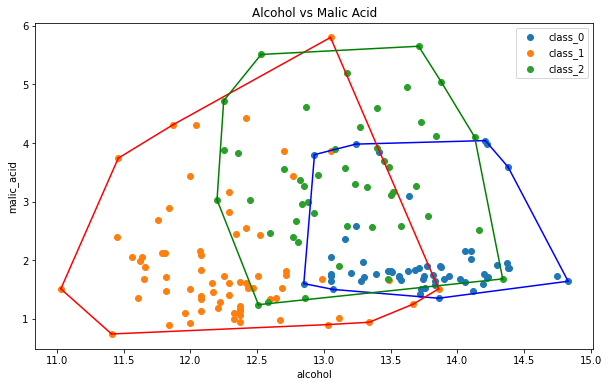

In [34]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Malic Acid')
x_plot = 0 ; y_plot = 1
plt.xlabel(data.feature_names[x_plot])
plt.ylabel(data.feature_names[y_plot])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[x_plot , y_plot]].values
    hulls = ch.convexHull(bucket)
    p1 = hulls[0]
    p2 = hulls[len(hulls)-1]
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

    upperP = p1 ; belowP = p1
    for idx in range(1,len(hulls)):
        p3 = hulls[idx]
        if(p3 == p2):
            #UPPER PART
            x_edge1 , y_edge1 = upperP[0] , upperP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
            x = np.array([x_edge1] + [x_edge2])
            y = np.array([y_edge1] + [y_edge2])
            plt.plot(x, y, colors[i])
            #BELOW PART
            x_edge1 , y_edge1 = belowP[0] , belowP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
        else:
            if(ch.whichArea(p1,p2,p3) == 1):
                x_edge1 , y_edge1 = upperP[0] , upperP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                upperP = p3
            elif(ch.whichArea(p1,p2,p3) == -1):
                x_edge1 , y_edge1 = belowP[0] , belowP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                belowP = p3

        x = np.array([x_edge1] + [x_edge2])
        y = np.array([y_edge1] + [y_edge2])
        plt.plot(x, y, colors[i])
    plt.legend()

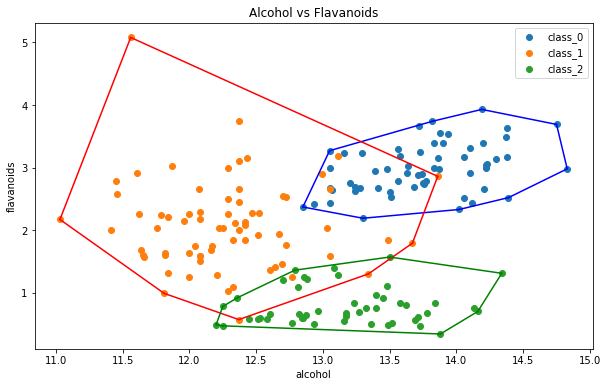

In [35]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Alcohol vs Flavanoids')
x_plot = 0 ; y_plot = 6
plt.xlabel(data.feature_names[x_plot])
plt.ylabel(data.feature_names[y_plot])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[x_plot , y_plot]].values
    hulls = ch.convexHull(bucket)
    p1 = hulls[0]
    p2 = hulls[len(hulls)-1]
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

    upperP = p1 ; belowP = p1
    for idx in range(1,len(hulls)):
        p3 = hulls[idx]
        if(p3 == p2):
            #UPPER PART
            x_edge1 , y_edge1 = upperP[0] , upperP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
            x = np.array([x_edge1] + [x_edge2])
            y = np.array([y_edge1] + [y_edge2])
            plt.plot(x, y, colors[i])
            #BELOW PART
            x_edge1 , y_edge1 = belowP[0] , belowP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
        else:
            if(ch.whichArea(p1,p2,p3) == 1):
                x_edge1 , y_edge1 = upperP[0] , upperP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                upperP = p3
            elif(ch.whichArea(p1,p2,p3) == -1):
                x_edge1 , y_edge1 = belowP[0] , belowP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                belowP = p3

        x = np.array([x_edge1] + [x_edge2])
        y = np.array([y_edge1] + [y_edge2])
        plt.plot(x, y, colors[i])
    plt.legend()

In [36]:
data = datasets.load_breast_cancer() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target) 

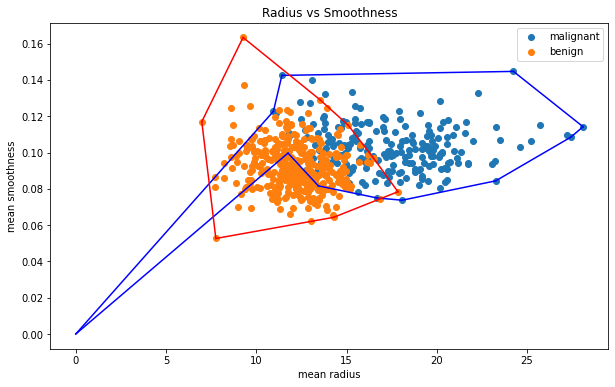

In [37]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Radius vs Smoothness')
x_plot = 0 ; y_plot = 4
plt.xlabel(data.feature_names[x_plot])
plt.ylabel(data.feature_names[y_plot])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[x_plot , y_plot]].values
    hulls = ch.convexHull(bucket)
    p1 = hulls[0]
    p2 = hulls[len(hulls)-1]
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

    upperP = p1 ; belowP = p1
    for idx in range(1,len(hulls)):
        p3 = hulls[idx]
        if(p3 == p2):
            #UPPER PART
            x_edge1 , y_edge1 = upperP[0] , upperP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
            x = np.array([x_edge1] + [x_edge2])
            y = np.array([y_edge1] + [y_edge2])
            plt.plot(x, y, colors[i])
            #BELOW PART
            x_edge1 , y_edge1 = belowP[0] , belowP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
        else:
            if(ch.whichArea(p1,p2,p3) == 1):
                x_edge1 , y_edge1 = upperP[0] , upperP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                upperP = p3
            elif(ch.whichArea(p1,p2,p3) == -1):
                x_edge1 , y_edge1 = belowP[0] , belowP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                belowP = p3

        x = np.array([x_edge1] + [x_edge2])
        y = np.array([y_edge1] + [y_edge2])
        plt.plot(x, y, colors[i])
    plt.legend()

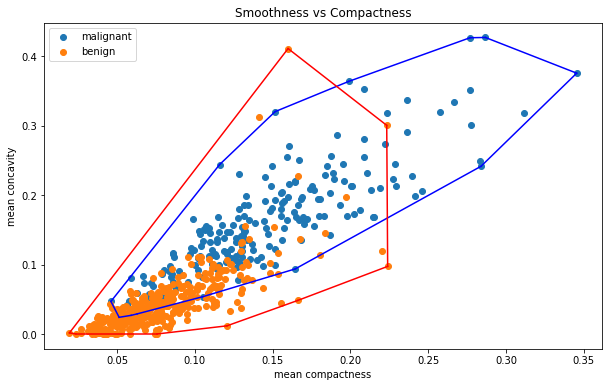

In [38]:
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Smoothness vs Compactness')
x_plot = 5 ; y_plot = 6
plt.xlabel(data.feature_names[x_plot])
plt.ylabel(data.feature_names[y_plot])
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[x_plot , y_plot]].values
    hulls = ch.convexHull(bucket)
    p1 = hulls[0]
    p2 = hulls[len(hulls)-1]
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])

    upperP = p1 ; belowP = p1
    for idx in range(1,len(hulls)):
        p3 = hulls[idx]
        if(p3 == p2):
            #UPPER PART
            x_edge1 , y_edge1 = upperP[0] , upperP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
            x = np.array([x_edge1] + [x_edge2])
            y = np.array([y_edge1] + [y_edge2])
            plt.plot(x, y, colors[i])
            #BELOW PART
            x_edge1 , y_edge1 = belowP[0] , belowP[1]
            x_edge2 , y_edge2 = p3[0] , p3[1]
        else:
            if(ch.whichArea(p1,p2,p3) == 1):
                x_edge1 , y_edge1 = upperP[0] , upperP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                upperP = p3
            elif(ch.whichArea(p1,p2,p3) == -1):
                x_edge1 , y_edge1 = belowP[0] , belowP[1]
                x_edge2 , y_edge2 = p3[0] , p3[1]
                belowP = p3

        x = np.array([x_edge1] + [x_edge2])
        y = np.array([y_edge1] + [y_edge2])
        plt.plot(x, y, colors[i])
    plt.legend()